# Проект: Исследование стартапов

- Автор: Исаева Камилла 
- Дата: 06.07.2025

### Цели и задачи проекта

**Цель:** Подготовить датасет, проверить соответствие данных здравому смыслу и ответить на вопросы заказчика о предобработке данных и их значении для бизнеса.

**Задачи:**
1. Определить столбцы для объединения данных из разных таблиц. 
2. Оценить достоверность данных о сотрудниках стартапов и их образовании. 
3. Проанализировать значение покупок за 0 или за 1 доллар. 
4. Изучить зависимость цены от категории стартапов и количества раундов финансирования перед покупкой. 
5. Рассчитать и отобразить численные показатели и динамику. 
6. Выявить показатели и признаки, указывающие на повышенную вероятность успешной сделки по покупке компании.

### Описание данных

Для анализа поступили исторические данные о стартапах:

**Основные таблицы:**

- `/dataset/company_and_rounds.csv` - информация о компаниях и раундах финансирования;
- `/dataset/acquisition.csv` - информация о покупках одними компаниями других компаний;
- `/dataset/people.csv` - информация о сотрудниках;
- `/dataset/education.csv` - информация об образовании сотрудника;
- `/dataset/degrees.csv` - информация о типе образования сотрудника.

**Дополнительные таблицы:**

- `/dataset/fund.csv` - информация о фондах;
- `/dataset/investment.csv` - информация о раундах инвестирования.

**Описание датасета `company_and_rounds`**
- `company ID` — идентификатор компании.
- `name` — название компании.
- `category code` — категория области деятельности компании.
- `status` — статус компании.
- `founded at` — дата инвестирования.
- `closed at` — дата закрытия компании.
- `domain` — официальный сайт компании.
- `network username` — ник компании в сети.
- `country code` — код страны компании.
- `investment rounds` — число инвестиционных раундов.
- `funding rounds` — число раундов финансирования.
- `funding total` — сумма финансирования.
- `milestones` — вехи финансирования.
- `funding round id` — идентификатор этапа финансирования.
- `company id` — идентификатор компании.
- `funded at` — дата финансирования.
- `funding round type` — тип финансирования.
- `raised amount` — сумма финансирования.
- `pre money valuation` — предварительная денежная оценка.
- `participants` — число участников.
- `is first round` — является ли раунд первым.
- `is last round` — является раунд последним.

**Описание датасета `acquisition`**
- `id` — идентификатор покупки.
- `acquiring_company_id` — идентификатор покупающей компании.
- `acquired_company_id` — идентификатор покупаемой компании.
- `term_code` — варианты расчёта.
- `price_amount` — сумма сделки.
- `acquired_at` — дата сделки.

**Описание датасета `people`**
- `id` — идентификатор сотрудника.
- `first_name` — имя сотрудника.
- `last_name` — фамилия сотрудника.
- `company_id` — идентификатор компании.
- `network_username` — ник в социальных сетях.

**Описание датасета `education`**
- `id` — идентификатор записи об образовании.
- `person_id` — идентификатор работника.
- `instituition` — название учебного заведения.
- `graduated_at` — дата получения образования.

**Описание датасета `degrees`**
- `id` — идентификатор записи.
- `object_id` — идентификатор сотрудника.
- `degree_type` — тип образования.
- `subject` — специальность.



**Описание датасета `fund`**
- `id` — идентификатор фонда.
- `name` — название фонда.
- `category_code` — категория области деятельности компании.
- `founded_at` — дата создания фонда.
- `domain` — сайт фонда.
- `network_username` — ник фонда в сети.
- `country_code` — код страны фонда.
- `investment_rounds` — число инвестиционных раундов.
- `invested_companies` — число профинансированных компаний.
- `milestones` — вехи финансирования.


**Описание датасета `investment`**
- `id` — идентификатор этапа инвестирования.
- `funding_round_id` — идентификатор раунда инвестирования.
- `company_id` — индентификатор компании.
- `funding_round_type` — тип финансирования.
- `fund_id` — идентификатор фонда.

### Структура проекта
**1. Знакомство с данными и их первичная предобработка:**
 - 1.1 Вывод общей информации и исправление названий столбцов.
 - 1.2 Смена типов данных и анализ пропусков.

**2. Предобработка данных и предварительное исследование:**
- 2.1 Анализ раундов финансирования по годам.
- 2.2 Исследование зависимости полноты сведений о сотрудниках от размера компаний.
- 2.3 Оценка возможности объединения данных по различным столбцам.
- 2.4 Анализ проблемного датасета и причин возникновения пропусков.

**3. Исследовательский анализ объединённых таблиц:**
- 3.1 Объединение данных для ответа на вопросы заказчика.
- 3.2 Анализ выбросов в столбце funding_total.
- 3.3 Исследование компаний, проданных за ноль или один доллар.
- 3.4 Выделение категорий стартапов с типично высокими ценами и разбросом цен.
- 3.5 Анализ количества раундов финансирования перед покупкой стартапа.

**4. Итоговый вывод**


## 1. Знакомство с данными: загрузка и первичная предобработка

### 1.1. Вывод общей информации, исправление названия столбцов

- Загрузим все данные по проекту.
- Проверим названия столбцов.
- Выведем информацию, которая необходима вам для принятия решений о предобработке, для каждого из датасетов.

---

Начнём с загрузки библиотек и датасетов. Будем использовать pandas и библиотеки визуализации данных matplotlib и seaborn, а также phik для построения матрицы корреляции. Данные датасетов сохраним переменных: 
`company_and_rounds_df`,
`acquisition_df`,
`people_df`,
`education_df`, 
`degrees_df`, 
`fund_df` и 
`investment_df`. Далее проверим названия столбцов и выведем информацию, которая необходима нам для принятия решений о предобработке, для каждого из датасетов.

In [1]:
# Установим phik
!pip install phik

In [2]:
# Установим matplotlib-venn
!pip install matplotlib-venn

In [3]:
# Импортируем библиотеки
import pandas as pd

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
from phik import phik_matrix

# Загружаем библиотеку для визуализации диаграммы Венна
from matplotlib_venn import venn2

In [4]:
# Выгружаем данные датасетов в переменные
company_and_rounds_df = pd.read_csv('https://code.s3.yandex.net/datasets/company_and_rounds.csv')
acquisition_df = pd.read_csv('https://code.s3.yandex.net/datasets/acquisition.csv')
people_df = pd.read_csv('https://code.s3.yandex.net/datasets/people.csv')
education_df = pd.read_csv('https://code.s3.yandex.net/datasets/education.csv')
degrees_df = pd.read_csv('https://code.s3.yandex.net/datasets/degrees.csv')

fund_df = pd.read_csv('https://code.s3.yandex.net/datasets/fund.csv')
investment_df = pd.read_csv('https://code.s3.yandex.net/datasets/investment.csv')


Познакомимся с данными основных датасетов (необязательные таблицы затрагивать не будем) — выведем первые строки методом `head()`, а информацию о датафреймах методом `info()`:

In [5]:
# Выводим первые строки датафрейма company_df на экран
company_and_rounds_df.head()

,company ID,name,category code,status,founded at,closed at,domain,network username,country code,investment rounds,...,milestones,funding round id,company id,funded at,funding round type,raised amount,pre money valuation,participants,is first round,is last round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Видим, что в датафрейме `company_and_rounds_df` есть одинаковые наименования столбцов: `company ID` и `company id`. Переименуем `company ID` в `company_id_1`, а `company id` в `company_id_2`. Также уберём лишние пробелы в столбцах датафрейма.

In [6]:
# Убираем лишние пробелы
company_and_rounds_df.columns = company_and_rounds_df.columns.map(lambda x: x.replace('  ', '_'))

In [7]:
# Меняем названия для столбцов
company_and_rounds_df = company_and_rounds_df.rename(columns={'company_ID':'company_id_1',
                          'company_id':'company_id_2'})

In [8]:
# Выводим информацию о датафрейме company_and_rounds_df
company_and_rounds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   company_id_1         217472 non-null  float64
 1   name                 217471 non-null  object 
 2   category_code        143886 non-null  object 
 3   status               217472 non-null  object 
 4   founded_at           109956 non-null  object 
 5   closed_at            3449 non-null    object 
 6   domain               147159 non-null  object 
 7   network_username     95534 non-null   object 
 8   country_code         108607 non-null  object 
 9   investment_rounds    217472 non-null  float64
 10  funding_rounds       217472 non-null  float64
 11  funding_total        217472 non-null  float64
 12  milestones           217472 non-null  float64
 13  funding_round_id     52928 non-null   float64
 14  company_id_2         52928 non-null   float64
 15  funded_at        

In [9]:
# Выводим первые строки датафрейма acquisition_df на экран
acquisition_df.head()

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


In [10]:
# Выводим информацию о датафрейме acquisition_df
acquisition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


In [11]:
# Выводим первые строки датафрейма people_df на экран
people_df.head()

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN


In [12]:
# Выводим информацию о датафрейме people_df
people_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226700 non-null  object 
 2   last_name         226705 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


In [13]:
# Выводим первые строки датафрейма education_df на экран
education_df.head()

,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN


In [14]:
# Выводим информацию о датафрейме education_df
education_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


In [15]:
# Выводим первые строки датафрейма degrees_df на экран
degrees_df.head()

,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


In [16]:
# Выводим информацию о датафрейме degrees_df
degrees_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98389 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


Мы загрузили необходимые библиотеки и датасеты. Проверили названия столбцов. Вывели информацию, которая необходима для принятия решений о предобработке, для каждого из датасетов.

### 1.2. Смена типов и анализ пропусков

- Обработаем типы данных в столбцах, которые хранят значения даты и времени.
- Оценим полноту данных — сделаем предварительный вывод, достаточно ли данных для решения задач проекта.

---

**Датафрейм `company_df`**

In [17]:
# Поменяем тип данных для столбцов с датой и временем в датафрейме company_df
company_and_rounds_df[['founded_at', 'closed_at', 'funded_at']] = company_and_rounds_df[['founded_at', 'closed_at', 'funded_at']].astype('datetime64[ns]')
company_and_rounds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_id_1         217472 non-null  float64       
 1   name                 217471 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  float64       
 10  funding_rounds       217472 non-null  float64       
 11  funding_total        217472 non-null  float64       
 12  milestones           217472 non-null  float64       
 13  funding_round_

In [18]:
# Проверим наличие пропусков в датафрейме company_df
company_and_rounds_df.isna().sum() 

company_id_1              302
name                      303
category_code           73888
status                    302
founded_at             107818
closed_at              214325
domain                  70615
network_username       122240
country_code           109167
investment_rounds         302
funding_rounds            302
funding_total             302
milestones                302
funding_round_id       164846
company_id_2           164846
funded_at              165094
funding_round_type     164846
raised_amount          164846
pre_money_valuation    164846
participants           164846
is_first_round         164846
is_last_round          164846
dtype: int64

In [19]:
# Подсчитываем процент строк с пропусками в датафрейме company_df
grouped_df = company_and_rounds_df.isna().sum() / company_and_rounds_df.shape[0] * 100
grouped_df.sort_values(ascending=False)

closed_at              98.416248
funded_at              75.809784
is_last_round          75.695905
funding_round_type     75.695905
is_first_round         75.695905
participants           75.695905
pre_money_valuation    75.695905
raised_amount          75.695905
funding_round_id       75.695905
company_id_2           75.695905
network_username       56.131586
country_code           50.128574
founded_at             49.509124
category_code          33.928752
domain                 32.425818
name                    0.139135
company_id_1            0.138676
milestones              0.138676
funding_rounds          0.138676
investment_rounds       0.138676
status                  0.138676
funding_total           0.138676
dtype: float64

**Датафрейм `acquisition_df`**

In [20]:
# Поменяем тип данных для столбцов с датой и временем в датафрейме acquisition_df
acquisition_df['acquired_at'] = acquisition_df['acquired_at'].astype('datetime64[ns]')
acquisition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    9407 non-null   int64         
 1   acquiring_company_id  9407 non-null   int64         
 2   acquired_company_id   9407 non-null   int64         
 3   term_code             1831 non-null   object        
 4   price_amount          9407 non-null   int64         
 5   acquired_at           9378 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 441.1+ KB


In [21]:
# Проверим наличие пропусков в датафрейме acquisition_df
acquisition_df.isna().sum() 

id                         0
acquiring_company_id       0
acquired_company_id        0
term_code               7576
price_amount               0
acquired_at               29
dtype: int64

In [22]:
# Подсчитываем процент строк с пропусками в датафрейме acquisition_df
acquisition_df.isna().sum() / acquisition_df.shape[0] * 100

id                       0.000000
acquiring_company_id     0.000000
acquired_company_id      0.000000
term_code               80.535771
price_amount             0.000000
acquired_at              0.308281
dtype: float64

**Датафрейм `education_df`**

In [23]:
# Поменяем тип данных для столбцов с датой и временем в датафрейме education_df
education_df['graduated_at'] = education_df['graduated_at'].astype('datetime64[ns]')
education_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            109610 non-null  int64         
 1   person_id     109610 non-null  int64         
 2   instituition  109555 non-null  object        
 3   graduated_at  58054 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.3+ MB


In [24]:
# Проверим наличие пропусков в датафрейме education_df
education_df.isna().sum() 

id                  0
person_id           0
instituition       55
graduated_at    51556
dtype: int64

In [25]:
# Подсчитываем процент строк с пропусками в датафрейме education_df
education_df.isna().sum() / education_df.shape[0] * 100

id               0.000000
person_id        0.000000
instituition     0.050178
graduated_at    47.035854
dtype: float64

**Датафрейм `people_df`**

In [26]:
# Проверим наличие пропусков в датафрейме people_df
people_df.isna().sum() 

id                       0
first_name               9
last_name                4
company_id          192094
network_username    187842
dtype: int64

In [27]:
# Подсчитываем процент строк с пропусками в датафрейме people_df
people_df.isna().sum() / people_df.shape[0] * 100

id                   0.000000
first_name           0.003970
last_name            0.001764
company_id          84.731528
network_username    82.855996
dtype: float64

**Датафрейм `degrees_df`**

In [28]:
# Проверим наличие пропусков в датафрейме degrees_df
degrees_df.isna().sum()

id                 0
object_id          0
degree_type    11221
subject        28312
dtype: int64

In [29]:
# Подсчитываем процент строк с пропусками в датафрейме degrees_df
degrees_df.isna().sum() / degrees_df.shape[0] * 100

id              0.000000
object_id       0.000000
degree_type    10.237205
subject        25.829760
dtype: float64

Мы обработали типы данных в столбцах, которые хранят значения даты и времени, а именно привели их типу данных `datetime64[ns]`.
Больше всего пропусков в датафрейме `company_and_rounds_df`, но при этом данных достаточно для решения задач проекта.

## 2. Предобработка данных, предварительное исследование


### 2.1. Раунды финансирования по годам

- Составим сводную таблицу по годам, в которой на основании столбца `raised_amount` для каждого года указан:
    - типичный размер средств, выделяемый в рамках одного раунда;
    - общее количество раундов финансирования за этот год.
    
- Оставим в таблице информацию только для тех лет, для которых есть информация о более чем 50 раундах финансирования.
- На основе получившейся таблицы построим график, который будет отражать динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования.

На основе полученных данных ответим на вопросы:

- В каком году типичный размер собранных в рамках одного раунда средств был максимален?
- Какая тенденция по количеству раундов и выделяемых в рамках каждого раунда средств наблюдалась в 2013 году?

---

Составим сводную таблицу:

In [30]:
# Извлекаем год из столбца 'funded_at'
company_and_rounds_df['funded_year'] = company_and_rounds_df['funded_at'].dt.year

# Создаём сводную таблицу
pivot_raised_amount = pd.pivot_table(company_and_rounds_df,
                                     index='funded_year',
                                     values='raised_amount',
                                     aggfunc=['median', 'count'])

# Оставим в таблице информацию только для тех лет, для которых есть информация о более чем 50 раундах финансировани
filtered_pivot = pivot_raised_amount[pivot_raised_amount[('count', 'raised_amount')] > 50].copy()

print(filtered_pivot)

                   median         count
            raised_amount raised_amount
funded_year                            
1999.0          2000000.0            76
2000.0          4200000.0           125
2001.0          3000000.0            96
2002.0          4200000.0           116
2003.0          3000000.0           159
2004.0          5000000.0           291
2005.0          5500000.0          1633
2006.0          5000000.0          2436
2007.0          3973320.0          3279
2008.0          3110000.0          3774
2009.0          2000000.0          4151
2010.0          1602500.0          6221
2011.0          1200000.0          9204
2012.0          1000000.0          9970
2013.0          1200000.0         11072


Построим график, который будет отражать динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования.

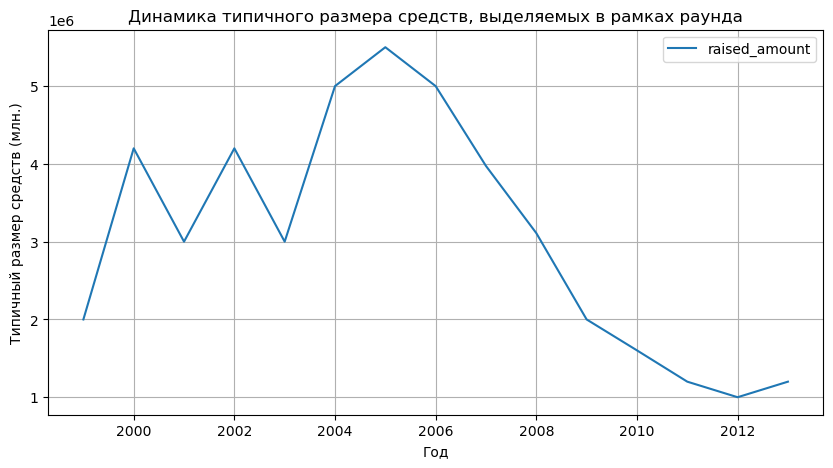

In [31]:
plt.rcParams["figure.figsize"] = (10, 5)
filtered_pivot['median'].plot(kind='line')
plt.title('Динамика типичного размера средств, выделяемых в рамках раунда')
plt.xlabel('Год')
plt.ylabel('Типичный размер средств (млн.)')
plt.grid()
plt.show()


На графике видим, что в 2005 году типичный размер собранных в рамках одного раунда средств был максимален.

Далее более детально рассмотрим 2013 год по количеству раундов и выделяемых в рамках каждого раунда средств.

In [32]:
# Создадим таблицу, в которой будут данные только для 2013 года
new_table = company_and_rounds_df.loc[company_and_rounds_df['funded_at'].dt.year == 2013, ['raised_amount', 'funded_at']]

# С помощью акцессора `dt` создаём новый столбец 'month' вида YYYY-MM
new_table['month'] = new_table['funded_at'].dt.to_period('M')

# Сгруппируем данные по месяцам и посчитаем количество значений raised_amount и медиану
grouped_by_month = new_table.groupby('month').agg({'raised_amount': ['median', 'count']})

# Переименовываем столбец count для наглядности
grouped_by_month.columns = ['median_raised_amount', 'count_raised_amount']

print(grouped_by_month)


         median_raised_amount  count_raised_amount
month                                             
2013-01              700000.0                 1024
2013-02             1000000.0                  740
2013-03              750000.0                  865
2013-04             1100000.0                  927
2013-05             1037500.0                  951
2013-06             1200000.0                 1039
2013-07             1500000.0                 1017
2013-08             1000000.0                  977
2013-09             1400000.0                 1064
2013-10             1500000.0                 1100
2013-11             1571950.0                  944
2013-12             3000000.0                  424


Построим линейный график для данных 2013 года.

array([<Axes: title={'center': 'Выделяемые в рамках каждого раунда средства'}, xlabel='Месяц'>,
       <Axes: title={'center': 'Количество раундов'}, xlabel='Месяц'>],
      dtype=object)

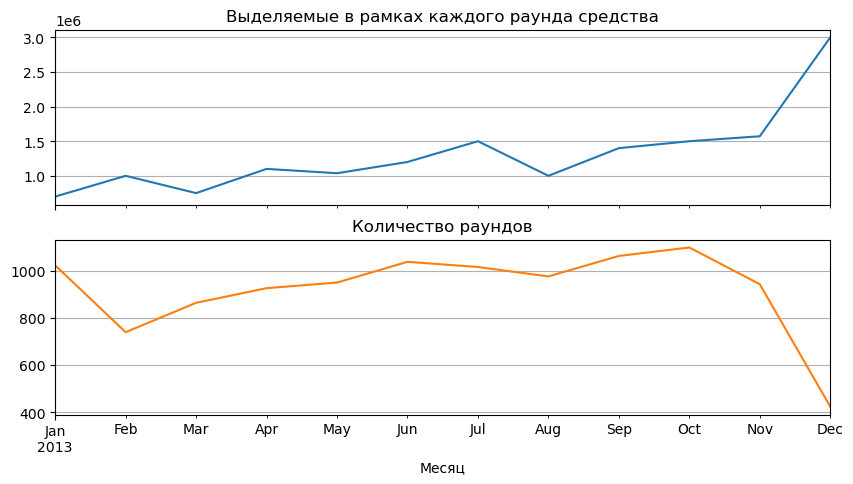

In [33]:
grouped_by_month.plot(kind='line',
            subplots=True,
            sharex=True,
            sharey=False,
            legend=False,
            grid = True,
            title=['Выделяемые в рамках каждого раунда средства', 'Количество раундов'],
            xlabel='Месяц')

Тенденция по выделяемым в рамках каждого раунда средств в 2013 году наблюдалась положительная. Количество раудов с февраля по октябрь имеют положительную тенденцию, а с октября по декабрь 2013 года - отрицательную.


### 2.2. Люди и их образование

Заказчик хочет понять, зависит ли полнота сведений о сотрудниках (например, об их образовании) от размера компаний.

- Оценим, насколько информация об образовании сотрудников полна. Используя датасеты `people.csv` и `education.csv`, разделим все компании на несколько групп по количеству сотрудников и оценим среднюю долю сотрудников без информации об образовании в каждой из групп.
- Оценим, возможно ли для выполнения задания присоединить к этим таблицам ещё и таблицу `degrees.csv`.

---

In [34]:
education_df.head()

,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaT
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaT


In [35]:
# Объединим данные о сотрудниках их образовании

people_education = people_df.merge(education_df, how = 'left', left_on='id', right_on='person_id')
people_education.head()

,id_x,first_name,last_name,company_id,network_username,id_y,person_id,instituition,graduated_at
0,10,Mark,Zuckerberg,5.0,NaN,2415.0,10.0,Harvard University,NaT
1,100,Peter,Lester,27.0,NaN,NaN,NaN,NaN,NaT
2,1000,Dr. Steven,E. Saunders,292.0,NaN,NaN,NaN,NaN,NaT
3,10000,Neil,Capel,2526.0,NaN,NaN,NaN,NaN,NaT
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaN,NaT


In [36]:
# Создадим новый столбец, в котором будет метка есть ли информация об образовании сотрудника
people_education['is_educated']= people_education['instituition'].notna() | people_education['graduated_at'].notna()
people_education.head()

,id_x,first_name,last_name,company_id,network_username,id_y,person_id,instituition,graduated_at,is_educated
0,10,Mark,Zuckerberg,5.0,NaN,2415.0,10.0,Harvard University,NaT,True
1,100,Peter,Lester,27.0,NaN,NaN,NaN,NaN,NaT,False
2,1000,Dr. Steven,E. Saunders,292.0,NaN,NaN,NaN,NaN,NaT,False
3,10000,Neil,Capel,2526.0,NaN,NaN,NaN,NaN,NaT,False
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaN,NaT,False


In [37]:
people_education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267694 entries, 0 to 267693
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id_x              267694 non-null  int64         
 1   first_name        267685 non-null  object        
 2   last_name         267690 non-null  object        
 3   company_id        44789 non-null   float64       
 4   network_username  50775 non-null   object        
 5   id_y              109056 non-null  float64       
 6   person_id         109056 non-null  float64       
 7   instituition      109002 non-null  object        
 8   graduated_at      57691 non-null   datetime64[ns]
 9   is_educated       267694 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 18.6+ MB


Далее оценим полноту информации об образовании. Мы сможем определить, у каких сотрудников нет данных об образовании, и посчитать их долю.

In [38]:
# Посчитаем долю сотрудников, у которых нет образования
1 - people_education['is_educated'].mean()

0.5926804485718769

Больше чем у половины сотрудников нет информации об образовании.

Далее будем делить все компании на несколько групп по количеству сотрудников и оценим среднюю долю сотрудников без информации об образовании в каждой из групп.

In [39]:
# Посчитаем количество сотрудников в каждой компании и выведем статистику этого столбца
people_education['staff'] = people_education.groupby('company_id')['id_x'].transform('count')
people_education['staff'].describe()

count    44789.000000
mean        10.503673
std         40.478166
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max        376.000000
Name: staff, dtype: float64

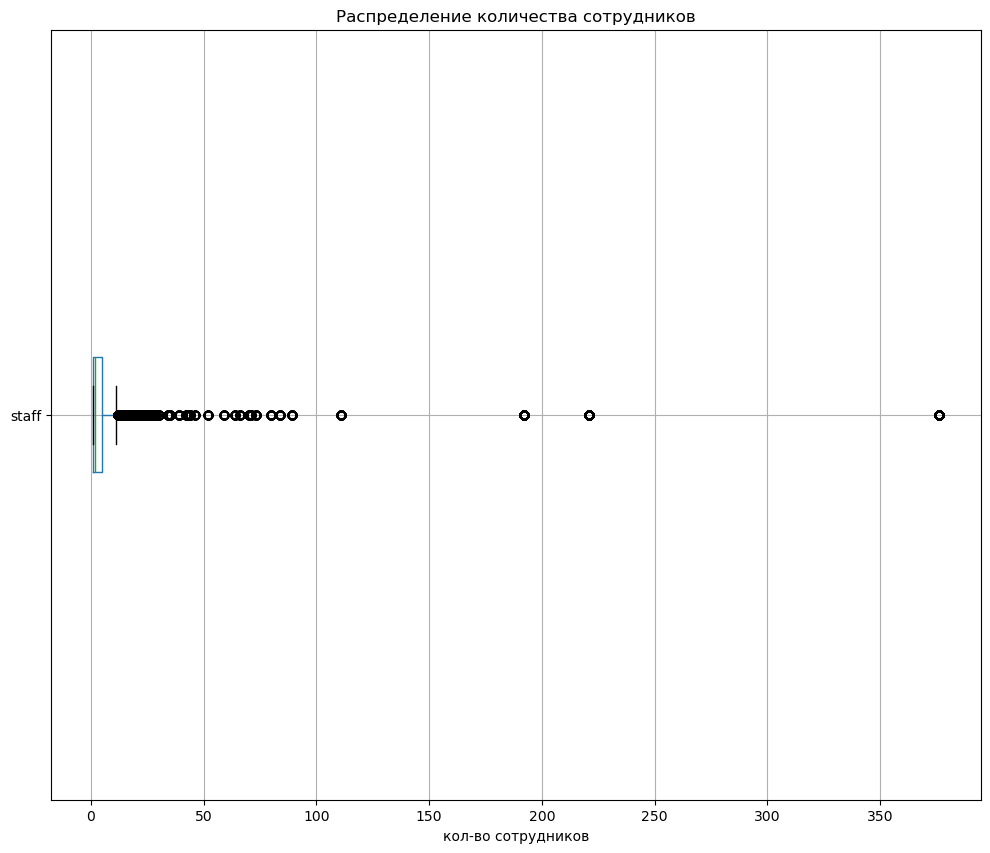

In [40]:
# Строим диаграмму размаха методом boxplot()
boxplot = people_education.boxplot(column='staff',
                     vert=False, 
                     figsize=(12, 10))

# Добавляем заголовок и метку оси X
boxplot.set_title('Распределение количества сотрудников')
boxplot.set_xlabel('кол-во сотрудников')

plt.show()

Исходя из данных, можно предложить следующую категоризацию:
- Малые компании: 1–5 сотрудников (соответствует 75% значений).
- Средние компании: 6–10 сотрудников (примерно среднее значение).
- Крупные компании: более 10 сотрудников.
- Также можно добавить категорию для компаний с очень большим количеством сотрудников - Крупнейшие компании: более 25–30 сотрудников (учитывая стандартное отклонение и максимальное значение).

In [41]:
# Разбиваем на категории с помощью pd.cut
people_education['staff_group'] = pd.cut(people_education['staff'], bins=[0, 5, 10, 30, 376], labels=["Малые компании", "Средние компании", "Крупные компании", "Крупнейшие компании"])

In [42]:
# Добавим столбец, в котором определим долю сотрудников без информации об образовании в каждой из групп
people_education['edu_share'] = people_education.groupby('staff_group', observed=False)['is_educated'].transform('mean')
people_education['edu_share'] = people_education['edu_share'].round(2)
people_education.head(10)

,id_x,first_name,last_name,company_id,network_username,id_y,person_id,instituition,graduated_at,is_educated,staff,staff_group,edu_share
0,10,Mark,Zuckerberg,5.0,NaN,2415.0,10.0,Harvard University,NaT,True,84.0,Крупнейшие компании,0.82
1,100,Peter,Lester,27.0,NaN,NaN,NaN,NaN,NaT,False,14.0,Крупные компании,0.71
2,1000,Dr. Steven,E. Saunders,292.0,NaN,NaN,NaN,NaN,NaT,False,3.0,Малые компании,0.62
3,10000,Neil,Capel,2526.0,NaN,NaN,NaN,NaN,NaT,False,2.0,Малые компании,0.62
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaN,NaT,False,NaN,NaN,NaN
5,100002,Keith,Kurzendoerfer,NaN,NaN,NaN,NaN,NaN,NaT,False,NaN,NaN,NaN
6,100006,Courtney,Homer,81558.0,jobsbostontech,83604.0,100006.0,MIT Sloan School of Management,2004-01-01,True,2.0,Малые компании,0.62
7,100009,Eddy,Badrina,NaN,NaN,NaN,NaN,NaN,NaT,False,NaN,NaN,NaN
8,100010,Michael,Dadashyan,NaN,fbroulette,NaN,NaN,NaN,NaT,False,NaN,NaN,NaN
9,100011,Jeff,Grell,NaN,NaN,NaN,NaN,NaN,NaT,False,NaN,NaN,NaN


In [43]:
# Сгруппируем данные по категориям и вычислим средние значения
summary = people_education.groupby('staff_group', observed=False).agg(
    average_edu_share=('edu_share', 'mean')
).reset_index()

print(summary)


           staff_group  average_edu_share
0       Малые компании               0.62
1     Средние компании               0.68
2     Крупные компании               0.71
3  Крупнейшие компании               0.82


Проверим, возможно ли для выполнения задания присоединить к таблице `people_education` ещё и таблицу `degrees.csv`.

In [44]:
# Попробуем поменять тип данных для столбцов, которые участвуют в присоединении датафреймов
people_education['id_x'] = people_education['id_x'].astype(str) 
degrees_df['object_id'] = degrees_df['object_id'].astype(str)
edu_tab = people_education.merge(degrees_df, how = 'left', left_on='id_x', right_on='object_id')

In [45]:
# Выводим информацию о получившемся датафрейме
edu_tab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267694 entries, 0 to 267693
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id_x              267694 non-null  object        
 1   first_name        267685 non-null  object        
 2   last_name         267690 non-null  object        
 3   company_id        44789 non-null   float64       
 4   network_username  50775 non-null   object        
 5   id_y              109056 non-null  float64       
 6   person_id         109056 non-null  float64       
 7   instituition      109002 non-null  object        
 8   graduated_at      57691 non-null   datetime64[ns]
 9   is_educated       267694 non-null  bool          
 10  staff             44789 non-null   float64       
 11  staff_group       44789 non-null   category      
 12  edu_share         44789 non-null   float64       
 13  id                0 non-null       float64       
 14  obje

Видим, что столбцы таблицы `degrees.csv` не совпали с данными таблиц `people` и `education`. Это значит, что невозможно для выполнения задания присоединить к таблице `people_education` ещё и таблицу `degrees.csv`.

### 2.3. Объединять или не объединять — вот в чём вопрос

Некоторые названия столбцов встречаются в датасетах чаще других. В результате предварительной проверки датасетов было выяснено, что столбец `company_id` подходит для объединения данных.

- Установим, подходит ли для объединения данных столбец `network_username`, который встречается в нескольких датасетах. Нам необходимо понимать, дублируется ли для разных датасетов информация в столбцах с таким названием, и если да — то насколько часто.
- Оценим, можно ли использовать столбцы с именем `network_username` для объединения данных.

---

Для ответа на поставленные вопросы будет удобно визуализировать отношения между разными множествами с помощью диаграммы Венна.

Сравним датафреймы 'company_and_rounds_df' и 'people_df'

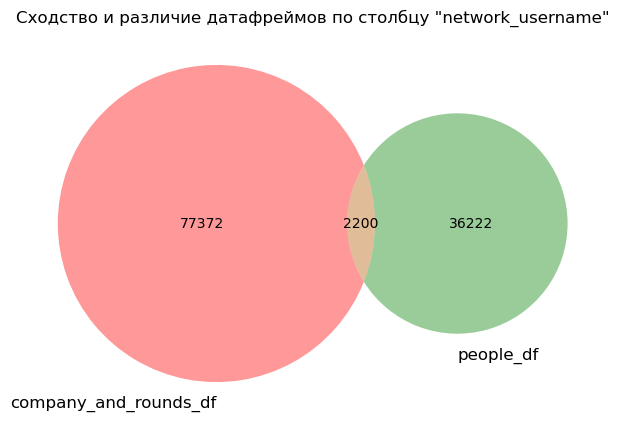

In [46]:
set1 = set(company_and_rounds_df['network_username'])
set2 = set(people_df['network_username'])

venn2([set1, set2], ('company_and_rounds_df', 'people_df'))

plt.title('Сходство и различие датафреймов по столбцу "network_username"')
plt.show()


Видим, что совпадает только 2200 записей.

Далее сравним датафреймы `company_and_rounds_df` и `fund_df`.

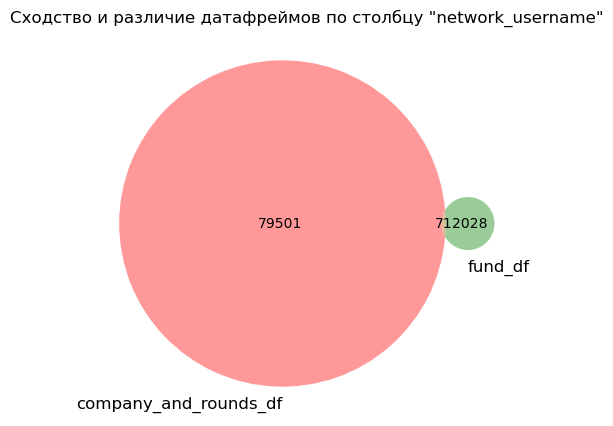

In [47]:
set1 = set(company_and_rounds_df['network_username'])
set2 = set(fund_df['network_username'])

venn2([set1, set2], ('company_and_rounds_df', 'fund_df'))

plt.title('Сходство и различие датафреймов по столбцу "network_username"')
plt.show()


Только 71 запись дублируется в обоих датафреймах. Следовательно использовать столбцы с именем `network_username` для объединения данных нельзя.


### 2.4. Проблемный датасет и причина возникновения пропусков

Во время собственного анализа данных у заказчика больше всего вопросов возникло к датасету `company_and_rounds.csv`. В нём много пропусков как раз в информации о раундах, которая заказчику важна.

- Любым удобным способом приведем данные в вид, который позволит в дальнейшем проводить анализ в разрезе отдельных компаний.

По гипотезе заказчика данные по компаниям из этой таблицы раньше хранились иначе, более удобным для исследования образом.

- Максимальным образом сохраняя данные, сохранив их связность и исключив возможные возникающие при этом ошибки, подготовим данные так, чтобы удобно было отобрать компании по параметрам и рассчитать показатели из расчёта на одну компанию без промежуточных агрегаций.

---

Выведем информацию о датафрейме `company_and_rounds_df`, чтобы выявить какие-то несостыковки в таблице.

In [48]:
company_and_rounds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_id_1         217472 non-null  float64       
 1   name                 217471 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  float64       
 10  funding_rounds       217472 non-null  float64       
 11  funding_total        217472 non-null  float64       
 12  milestones           217472 non-null  float64       
 13  funding_round_

Можем заметить, что количество записей различается начиная с 13 строки - `funding_round_id`. Возможно 2 разные таблицы были объединены в датасет `company_and_rounds.csv` 

In [49]:
# Разделим датафрейм company_and_rounds_df на 2 части 
company_df = company_and_rounds_df.iloc[:, :13]  # Выбираем все строки и столбцы до 13-го (не включая его)
rounds_df = company_and_rounds_df.iloc[:, 13:]  # Выбираем все строки и столбцы начиная с 13-го

Сначала рассмотрим датафрейм `company_df`

In [50]:
# Проверим наличие пропусков в датафрейме company_df
company_df.isna().sum() 

company_id_1            302
name                    303
category_code         73888
status                  302
founded_at           107818
closed_at            214325
domain                70615
network_username     122240
country_code         109167
investment_rounds       302
funding_rounds          302
funding_total           302
milestones              302
dtype: int64

In [51]:
# Подсчитываем процент строк с пропусками в датафрейме company_df
company_df.isna().sum() / company_df.shape[0] * 100

company_id_1          0.138676
name                  0.139135
category_code        33.928752
status                0.138676
founded_at           49.509124
closed_at            98.416248
domain               32.425818
network_username     56.131586
country_code         50.128574
investment_rounds     0.138676
funding_rounds        0.138676
funding_total         0.138676
milestones            0.138676
dtype: float64

Удалим пропуски в столбце `company_id_1`, так как без id компаний, мы не можем идентифицировать запись.

In [52]:
company_df = company_df.dropna(subset = ['company_id_1'])
company_df.isna().sum() / company_df.shape[0] * 100

company_id_1          0.000000
name                  0.000460
category_code        33.837000
status                0.000000
founded_at           49.439008
closed_at            98.414049
domain               32.331978
network_username     56.070667
country_code         50.059318
investment_rounds     0.000000
funding_rounds        0.000000
funding_total         0.000000
milestones            0.000000
dtype: float64

Оставшиеся пропуски оставим как есть, так как пропусков слишком много, восстановить данные мы не можем, а удаление приведет потере данных в других строках.

Далее проверим дубликаты и удалим, если таковые есть.

In [53]:
# Проверяем явные дубликаты в датафрейме company_df
company_df.duplicated().sum()

20919

In [54]:
# Удаляем дубликаты в датафрейме company_df
company_df = company_df.drop_duplicates(subset=None, keep='first', inplace=False)
company_df.duplicated().sum()

0

В датафрейме теперь нет полных дубликатов строк. Проверим неявные дубликаты — значения по 'company_id_1' компаний должны быть уникальными, то есть каждая строка в данных — уникальная компания:

In [55]:
# Проверяем неявные дубликаты в датафрейме company_df
company_df.duplicated(subset='company_id_1').sum()

0

Предоработаем датафрейм `rounds_df`.

In [56]:
rounds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   funding_round_id     52928 non-null  float64       
 1   company_id_2         52928 non-null  float64       
 2   funded_at            52680 non-null  datetime64[ns]
 3   funding_round_type   52928 non-null  object        
 4   raised_amount        52928 non-null  float64       
 5   pre_money_valuation  52928 non-null  float64       
 6   participants         52928 non-null  float64       
 7   is_first_round       52928 non-null  float64       
 8   is_last_round        52928 non-null  float64       
 9   funded_year          52680 non-null  float64       
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 16.6+ MB


In [57]:
# Проверим наличие пропусков в датафрейме rounds_df
rounds_df.isna().sum() 

funding_round_id       164846
company_id_2           164846
funded_at              165094
funding_round_type     164846
raised_amount          164846
pre_money_valuation    164846
participants           164846
is_first_round         164846
is_last_round          164846
funded_year            165094
dtype: int64

In [58]:
# Подсчитываем процент строк с пропусками в датафрейме rounds_df
rounds_df.isna().sum() / rounds_df.shape[0] * 100

funding_round_id       75.695905
company_id_2           75.695905
funded_at              75.809784
funding_round_type     75.695905
raised_amount          75.695905
pre_money_valuation    75.695905
participants           75.695905
is_first_round         75.695905
is_last_round          75.695905
funded_year            75.809784
dtype: float64

Также удалим пропуски в столбце `company_id_2`, без id мы не можем идентифицировать компании.

In [59]:
rounds_df = rounds_df.dropna()
rounds_df.isna().sum() / rounds_df.shape[0] * 100

funding_round_id       0.0
company_id_2           0.0
funded_at              0.0
funding_round_type     0.0
raised_amount          0.0
pre_money_valuation    0.0
participants           0.0
is_first_round         0.0
is_last_round          0.0
funded_year            0.0
dtype: float64

In [60]:
# Проверяем явные дубликаты в датафрейме rounds_df
rounds_df.duplicated().sum()

0

Для дальнейшего анализа данных в разрезе отдельных компаний, мы разделили датасет`company_and_rounds.csv` на два отдельных датафрейма: `company_df` и `rounds_df`  

Также максимальным образом сохраняя данные, сохранив их связность и исключив возможные возникающие при этом ошибки, мы подготовили данные так, чтобы удобно было отобрать компании по параметрам и рассчитать показатели из расчёта на одну компанию без промежуточных агрегаций.


## 3. Исследовательский анализ объединённых таблиц



### 3.1. Объединение данных

Объединим данные для ответа на вопросы заказчика, которые касаются интересующих его компаний. Заказчика прежде всего интересуют те компании, которые меняли или готовы менять владельцев. Получение инвестиций или финансирования, по мнению заказчика, означает интерес к покупке или продаже компании.

В качестве основы для объединённой таблицы возьмем данные из обработанного датасета `company_and_rounds.csv` — выберем только те компании, у которых указаны значения `funding_rounds` или `investment_rounds` больше нуля, или те, у которых в колонке `status` указано `acquired`. 

---

Нам нужна информация о покупке одних компаний другими. Объединим датафреймы `company_df` и `acquisition_df`:

In [61]:
company_acquisition_df = company_df.merge(acquisition_df, how = 'left', right_on = 'acquiring_company_id', left_on = 'company_id_1')
company_acquisition_df.head()

,company_id_1,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0,NaN,NaN,NaN,NaN,NaN,NaT
1,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaT
2,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,0.0,0.0,4.0,NaN,NaN,NaN,NaN,NaN,NaT
3,10000.0,MYWEBBO,network_hosting,operating,2008-07-26,NaT,mywebbo.com,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaT
4,10001.0,THE Movie Streamer,games_video,operating,2008-07-26,NaT,themoviestreamer.com,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaT


In [62]:
# Фильтрация компаний
company_acquisition_df  = company_acquisition_df [(company_acquisition_df ['funding_rounds'] > 0) | (company_acquisition_df ['investment_rounds'] > 0) | (company_acquisition_df ['status'] == 'acquired')]

# Проверка количества компаний
print("Количество компаний:", len(company_acquisition_df ))

Количество компаний: 44161


In [63]:
# Анализ данных
company_acquisition_df .head()

,company_id_1,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0,NaN,NaN,NaN,NaN,NaN,NaT
1,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaT
2,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,0.0,0.0,4.0,NaN,NaN,NaN,NaN,NaN,NaT
13,1001.0,FriendFeed,web,acquired,2007-10-01,NaT,friendfeed.com,friendfeed,USA,0.0,1.0,5000000.0,3.0,NaN,NaN,NaN,NaN,NaN,NaT
18,10014.0,Mobclix,mobile,acquired,2008-03-01,NaT,mobclix.com,mobclix,USA,0.0,1.0,0.0,4.0,3727.0,10014.0,31658.0,NaN,0.0,2010-03-01



### 3.2. Анализ выбросов

Заказчика интересует обычный для рассматриваемого периода размер средств, который предоставлялся компаниям.

По предобработанному столбцу `funding_total` графическим способом оценим, какой размер общего финансирования для одной компании будет типичным, а какой — выбивающимся.

---

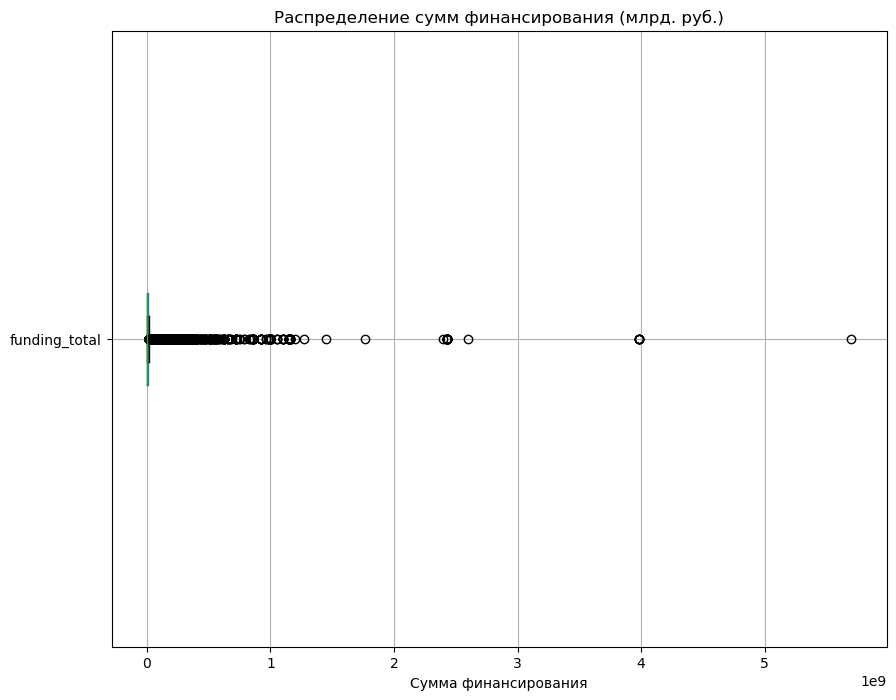

In [64]:
# Строим диаграмму размаха методом boxplot()
boxplot = company_acquisition_df.boxplot(column='funding_total',
                            vert=False,
                            figsize=(10, 8))

# Добавляем заголовок и метку оси X
boxplot.set_title('Распределение сумм финансирования (млрд. руб.)')
boxplot.set_xlabel('Сумма финансирования')

plt.show()


Детализируем график, игнорируя крайние выбросы, чтобы медиана, первый и третий квартили были более заметны.

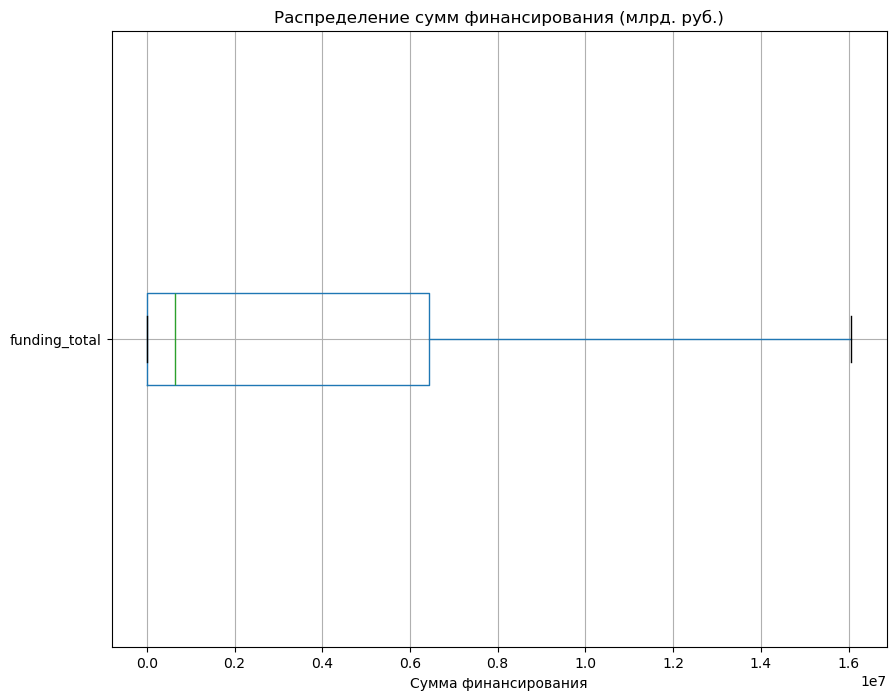

In [65]:
# Строим диаграмму размаха методом boxplot()
boxplot = company_acquisition_df.boxplot(column='funding_total',
                            vert=False,
                            figsize=(10, 8), showfliers=False)

# Добавляем заголовок и метку оси X
boxplot.set_title('Распределение сумм финансирования (млрд. руб.)')
boxplot.set_xlabel('Сумма финансирования')


plt.show()

Типичным размером общего финансирования для одной компании будет размер финансирования равный медиане на графиках, а выбивающимся - равный выбросам.

In [66]:
# Рассмотрим статистику, которую выведет метод describe()
company_acquisition_df['funding_total'].describe().to_frame().style.format('{:.0f}')

,funding_total
count,44161
mean,18311633
std,119671013
min,0
25%,0
50%,643300
75%,6430000
max,5700000000


Среднее значение общего финансирования для компаний равняется 10135610 рублям.
Стандартное отклонение равное 56464360 показывает, насколько значения финансирования отклоняются от среднего. Высокое стандартное отклонение указывает на большой разброс значений. 0-25% компаний имеют финансирование, равное или меньшее 0. Половина компаний имеет финансирование, равное или меньшее 600000 рублям. 75% компаний имеют финансирование, равное или меньшее 5650650. Максимальное финансирование равно 5,7 млрд. рублей. Обычные способы нахождения типичных значений не применимы к данным.


### 3.3. Куплены забесплатно?

- Исследуем компании, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования.

- Рассчитаем аналитически верхнюю и нижнюю границу выбросов для столбца `funding_total` и укажем, каким процентилям границы соответствуют.

---

In [67]:
# Фильтруем данные так, чтобы вывести компании, которые были проданы за ноль или за один доллар и у них ненулевой общий объём финансирования.
company_acquisition_df = company_acquisition_df[(company_acquisition_df['funding_total'] > 1) & ((company_acquisition_df['price_amount'] == 0) | (company_acquisition_df['price_amount'] == 1))]
company_acquisition_df.head()

,company_id_1,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
51,100331.0,Solectria Renewables,cleantech,operating,NaT,NaT,solren.com,SolectriaRen,USA,0.0,1.0,2100000.0,0.0,6895.0,100331.0,152557.0,NaN,0.0,2012-03-20
111,100844.0,Attunity,software,ipo,NaT,NaT,attunity.com,attunity,USA,0.0,4.0,10500000.0,1.0,6113.0,100844.0,100840.0,NaN,0.0,2011-09-07
126,100938.0,The Local,news,operating,2004-04-01,NaT,thelocal.com,NaN,SWE,0.0,3.0,3933520.0,1.0,6114.0,100938.0,100937.0,NaN,0.0,2008-12-01
172,10120.0,MetaPack,software,operating,1999-01-01,NaT,metapack.com,MetaPack,GBR,0.0,2.0,30772000.0,2.0,10519.0,10120.0,285956.0,NaN,0.0,2013-12-11
261,10176.0,Yammer,enterprise,acquired,2008-09-10,NaT,yammer.com,yammer,USA,0.0,5.0,142000000.0,3.0,6978.0,10176.0,25170.0,NaN,0.0,2012-04-11


Рассчитаем аналитически верхнюю и нижнюю границу выбросов для столбца `funding_total`

In [68]:
Q1 = company_acquisition_df['funding_total'].quantile(0.25)
Q3 = company_acquisition_df['funding_total'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
print(f'Межквартильный размах равен: {IQR}')
print(f'Нижний порог равен: {lower}')
print(f'Верхний порог равен: {upper}')

Межквартильный размах равен: 66300000.0
Нижний порог равен: -92750000.0
Верхний порог равен: 172450000.0


Далее рассчитаем процентили, чтобы определить каким границы выбросов соответствуют:

In [69]:
company_acquisition_df['funding_total'].describe(percentiles=[0.5, 0.6, 0.7, 0.8, 0.85, 0.95, 0.99]).to_frame().style.format('{:.0f}')

,funding_total
count,2567
mean,139601912
std,382338711
min,4000
50%,25000000
60%,35000000
70%,56845860
80%,97312500
85%,147650000
95%,1000000000


Верхняя граница выбросов соответствует 85-му процентилю.


### 3.4. Цены стартапов по категориям

Категории стартапов с типично высокими ценами покупки стартапов и значительным разбросом цен могут быть привлекательными для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов. Среди категорий стартапов выделим категории стартапов, характеризующиеся:

- типично высокими ценами;
- и наибольшим разбросом цен за стартап.

---

Мы хотим сосредоточиться на наиболее значимых категориях, поэтому выберем топ-10. Это позволит нам детально проанализировать ключевые категории без перегрузки информацией.

Сначала выведем категории стартапов, характеризующихся типично высокими ценами:

In [70]:
top_10 = company_acquisition_df.groupby('category_code')['funding_total'].mean().nlargest(10).round(0) / 1000
print(top_10)

category_code
social            1046670.536
nanotech           502860.000
hardware           434078.996
travel             266283.906
web                210247.731
mobile             193419.205
games_video        172899.501
cleantech          155807.232
transportation     151902.057
fashion            119316.667
Name: funding_total, dtype: float64


Наиболее высокой типичной ценой характеризуется категория `social` - это более 1 млрд рублей. На втором месте категория - `nanotech`, при том типичная цена вдвое меньше, чем у `social`. На третьем месте по величине цены компании стоят стартапы категории `hardware` - 434 млн. рублей. Что касается наименьшей цены компаний топ-10 - это стартапы категории `fashion` стоимостью почти 120 млн. рублей. 

In [71]:
top_10_std = company_acquisition_df.groupby('category_code')['funding_total'].std().nlargest(10).round(0) / 1000
print(top_10_std)

category_code
social              1015957.977
mobile               789705.570
hardware             475129.973
web                  396601.212
games_video          284779.252
cleantech            251570.487
travel               234416.787
public_relations     201298.140
ecommerce            194887.209
news                 177717.568
Name: funding_total, dtype: float64



### 3.5. Сколько раундов продержится стартап перед покупкой

- Необходимо проанализировать столбец `funding_rounds`. Исследуем значения столбца. Заказчика интересует типичное значение количества раундов для каждого возможного статуса стартапа.
- Построим график, который отображает, сколько в среднем раундов финансирования проходило для стартапов из каждой группы.

---

In [72]:
# Рассчитаем типичное значение количества раундов для каждого возможного статуса стартапа
mean_rounds_count = company_acquisition_df.groupby('status')['funding_rounds'].mean().round(2)
print(mean_rounds_count )

status
acquired     2.81
closed       1.64
ipo          2.78
operating    3.04
Name: funding_rounds, dtype: float64


Построим график, который отображает, сколько в среднем раундов финансирования проходило для стартапов из каждой группы:

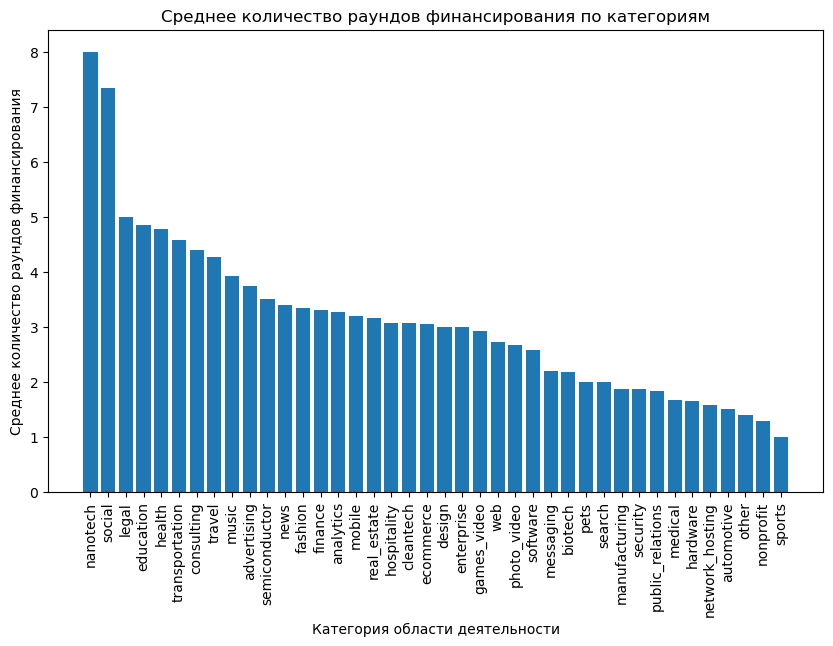

In [73]:
# Группируем данные по категории и вычисляем среднее количество раундов финансирования
average_rounds_by_category = company_acquisition_df.groupby('category_code')['funding_rounds'].mean().reset_index()

# Сортируем данные по среднему количеству раундов в порядке убывания
sorted_data = average_rounds_by_category.sort_values('funding_rounds', ascending=False)

# Строим график
plt.figure(figsize=(10, 6))
plt.bar(sorted_data['category_code'], sorted_data['funding_rounds'])
plt.xlabel('Категория области деятельности')
plt.ylabel('Среднее количество раундов финансирования')
plt.title('Среднее количество раундов финансирования по категориям')
plt.xticks(rotation=90)
plt.show()


Из данных видно, что среднее количество раундов финансирования сильно варьируется в зависимости от категории деятельности компании. Например, категории с наибольшим количеством раундов включают:
- Nanotech (8.00)
- Social (7.34)
- Legal (5.00)
- Education (4.86)

Это может указывать на то, что стартапы в этих областях требуют больше раундов для привлечения необходимых средств или имеют более сложные пути развития.

С другой стороны, категории с наименьшим количеством раундов, такие как:
- Sports (1.00)
- Nonprofit (1.29)
- Other (1.40)
- Network_hosting (1.57)

Могут свидетельствовать о том, что для стартапов в этих областях требуется меньше раундов финансирования или они могут быстрее достигать своих финансовых целей.
В целом, анализ показывает значительное разнообразие подходов к финансированию стартапов в зависимости от их сферы деятельности.


## 4. Итоговый вывод


Мы загрузили все данные по проекту и проверили названия столбцов. Было выявлено, что в таблице `company_and_rounds` между словами в названиях столбцов двойной пробел и что 2 столбца имеют одинаковое наименование. Мы заменили двойные пробелы на нижнее подчеркивание, а также переименовали одинаковые столбцы.

Далее мы обработали типы данных и проанализировали пропуски, чтобы понять, достаточно ли данных для решения задач.
Типы данных поменяли для столбцов со временем и датой на `datetime64`, согласно заданию.

Во второй главе мы составили сводную таблицу по годам с информацией о типичном размере средств и общем количестве раундов финансирования. Выявили, что что в 2005 году типичный размер собранных в рамках одного раунда средств был максимален. Построили график, отражающий динамику типичного размера средств, и более детально рассмотрели данные за 2013 год: тенденция по выделяемым в рамках каждого раунда средств в 2013 году наблюдалась положительная. Количество раудов с февраля по октябрь имеют положительную тенденцию, а с октября по декабрь 2013 года - отрицательную.

В пункте 2.2 Проанализировали информацию об образовании сотрудников и оценили зависимость полноты сведений от размера компаний. Получили следующие доли: для малых компаний - 0.62, средних компаний - 0.68, крупные компании  - это 0.71, для крупнейших компаний - 0.82. Чем крупнее компания, тем более полные данные мы имеем.

Далее мы привели проблемный датасет `company_and_rounds.csv` в удобный для анализа вид. И провели исслеlовательский анализ данных на его основе:  
- Графическим способом оценили типичный и выбивающийся размер общего финансирования для одной компании по столбцу `funding_total`.
- Рассчитали аналитически верхнюю и нижнюю границу выбросов для столбца funding_total и указали процентили, которым соответствуют эти границы.
- Выделили категории стартапов с типично высокими ценами покупки - это `social`, `nanotech` и`hardware`, а также рассмотрели категории компаний,  чьи стартапы имеют значительный разбросом цен.
- Проанализировали столбец `funding_rounds`, исследуя значения для каждого возможного статуса стартапа и построили график, отображающий среднее количество раундов финансирования для стартапов из каждой группы. Категории с наибольшим количеством раундов включают: Nanotech (8.00), Social (7.34), Legal (5.00) и Education (4.86).